# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [34]:
employee = pd.read_csv('Employee.csv')
employee.head(50)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


La primera manera de hacerlo es hacer un groupby, y de él hacemos el cálculo de la media de la columna `Salary`

In [17]:
employee.groupby(['Department'])[['Salary']].mean()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


Al utilizar pivot_tables tenemos que tener en cuenta cuál va a ser la columna que utilicemos como índice y cuál es sobre la que queremos hacer estadísticos para obtener la información.
Por eso en este caso utilizamos como index `Department` y como values `Salary`.

Por defecto, el valor que calcula es la media. Y para demostrarlo hacemos el cálculo declarando explícitamente y no. :)

In [8]:
employee.pivot_table(index=["Department"], values=["Salary"], aggfunc=np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [9]:
employee.pivot_table(index=['Department'], values=['Salary'])

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [18]:
employee.pivot_table(index=['Department', 'Title'], values=['Salary'])

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [32]:
employee.pivot_table(index=['Department', 'Title'], values=['Salary', 'Years'])

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### We want to know the information about the mean salary and number of employees in each department and for each job title

## *Método para contar elementos no nulos* ---> `np.count_nonzero`

In [31]:
employee.pivot_table(index=['Department', 'Title'], values=['Salary', 'Name'], aggfunc = {'Name': np.count_nonzero})

Name
Department Title          
HR         VP            1
           analyst       2
IT         VP            1
           analyst       2
           associate     1
Sales      associate     2

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [45]:
employee_stats = employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc=[np.mean, min, max, np.std])
employee_stats



mean    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

Como podemos observar, los valores cuyo mínimo y máximo coinciden (y, por tanto, su media) no sufren ninguna desviación y dan como resultado NaN. Esto es un error y debiera dar 0.
Por otra parte, vemos que en los puestos de analista para los departamentos de HR e IT sí que hay una variación puesto que no hay un salario fijo y la desviación es ligeramente alta.

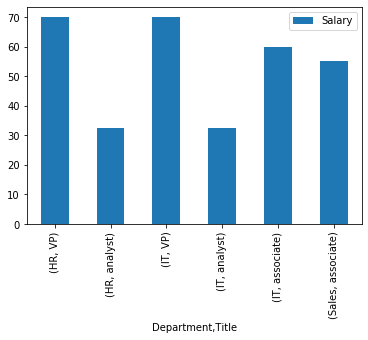

In [75]:
import matplotlib.pyplot as plt

employee_mean = employee[['Department', 'Title','Salary']].groupby(['Department', 'Title']).agg('mean')
employee_mean.plot.bar();

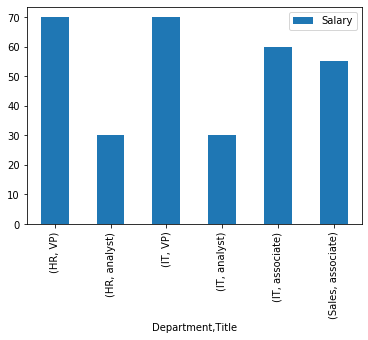

In [76]:
employee_min = employee[['Department', 'Title','Salary']].groupby(['Department', 'Title']).agg('min')
employee_min.plot.bar();

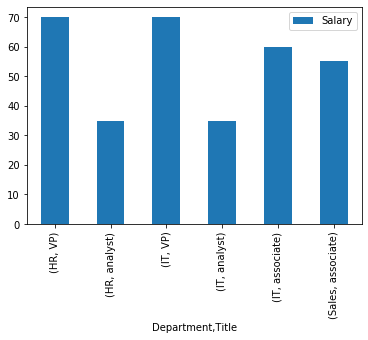

In [77]:
employee_max = employee[['Department', 'Title','Salary']].groupby(['Department', 'Title']).agg('max')
employee_max.plot.bar();

In [66]:
employee_plot.head()

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0

#### Based on your comments, fill the missing values with an appropriate value

In [47]:
employee_stats.fillna(0)

mean    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [69]:
employee.pivot_table(index=['Department', 'Title'], \
                     values=['Salary', 'Name'], \
                     aggfunc = {'Salary': np.sum, 'Name': np.count_nonzero})

Name  Salary
Department Title                  
HR         VP            1      70
           analyst       2      65
IT         VP            1      70
           analyst       2      65
           associate     1      60
Sales      associate     2     110

#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [72]:
employee.pivot_table(index=['Department', 'Title'], \
                     values=['Salary', 'Years'], \
                     aggfunc = {'Salary': np.mean, 'Years': np.sum})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
# your answer here--Your custom function here
        

In [13]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [73]:
fitbit = pd.read_csv('Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [78]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [79]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [80]:
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

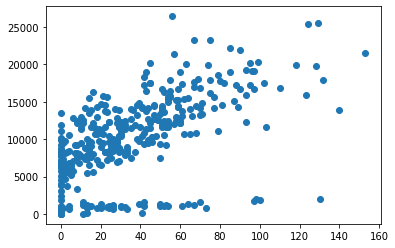

In [83]:
import matplotlib.pyplot as plt
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps']);

#### What can you say about Minute Very Active and Steps? Write a comment below

Como podemos observar por el factor de correlación y la gráfico están correlados.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [86]:
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

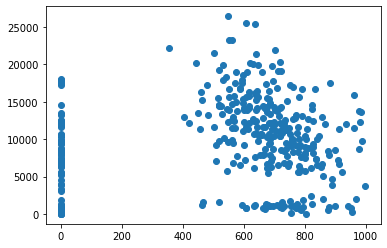

In [87]:
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps']);

Tiene un factor de correlación bastante bajo y como podemos ver en la gráfica no se sigue un patrón determinado

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [88]:
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

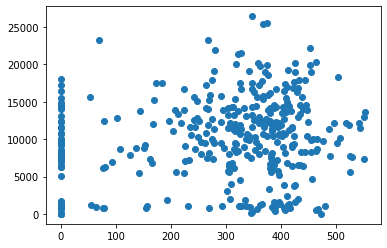

In [89]:
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps']);

En este caso, aunque el factor de correlación es más alto que el anterior, sigue siendo bajo y la gráfica muestra que no existe una posible aproximación de los datos


#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [95]:
fitbit_crossed = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]
fitbit_crossed.head()


,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407


In [97]:
cor_fit = fitbit_crossed.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

A la vista de los resultados en la matriz de correlación podemos ver que hay más correlación entre los campos:
* Minutes Very Active - Steps:  *0.571452*
* Minutes Very Active - Floors:  *0.399503*
* Calorie burned - Steps:  *0.255305*
* Minutes Sedentary - MinutesOfSleep:  *0.204242*
* Minutes Very Active - Calorie burned:  *0.197881*

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [98]:
time_grades = pd.read_csv('Time_Grades.csv')

In [116]:
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

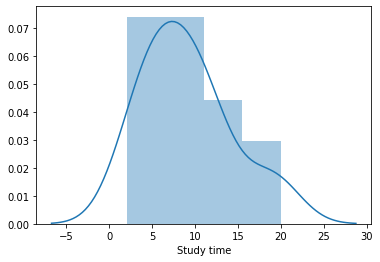

In [122]:
sns.distplot(time_grades['Study time']);

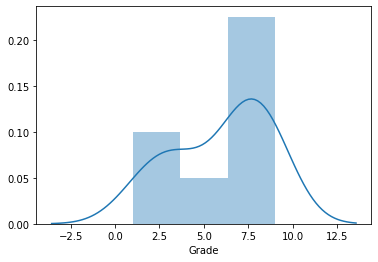

In [123]:
sns.distplot(time_grades['Grade']);

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [108]:
time_grades['Study time'].corr(time_grades['Grade'], method='pearson')

0.7980456073578858

In [111]:
time_grades['Study time'].corr(time_grades['Grade'])

0.7980456073578858

In [110]:
time_grades['Study time'].corr(time_grades['Grade'], method='spearman')

0.819658753036942

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

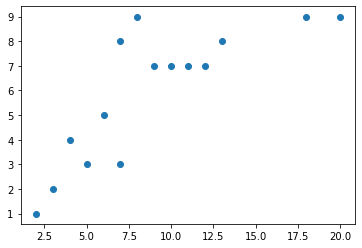

In [112]:
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade']);

Observando los valores de correlación de Pearson y de Spearman vemos que es mayor en el caso en el que utilizamos el método de Spearman, esto es (como podemos apreciar en la gráfica) que la correlación existente entre los datos no sigue una regresión lineal. Por tanto, es más acertado en este caso calcular el factor de correlación mediantye el método de Spearman.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

Las diferencias existenctes entre Pearson y Spearman.

* ### Pruebas paramétricas - pruebas no paramétricas:  
Las pruebas paramétricas asumen distribuciones estadísticas subyacentes a los datos, mientras que las no paramétricas no.  
Las no paramétricas son más robustas, las paramétricas tienen más potencia estadística.
Pearson es paramétrica. Spearman es no paramétrica.  


* ### Distribución normal de los datos:    
En relación con lo anterior, Pearson funciona mejor en variables normalizadas o tendentes a ellas; sin embargo: Spearman permite el estudio de valores extremos y distribuciones no normalizadas.  


* ### Los datos:  
Con Pearson medimos la relación lineal entre 2 variables cuantitativas independiente de la escala de medida de las variables, con Spearman entre 2 variables aleatorias continuas (se ordenan).  
Con Spearman medimos que haya una relación monotónica entre las variables, pero estas no tienen porqué seguir un patrón lineal.  



* ### Inferencia de conclusiones:  
Pearson no refleja cambios en los patrones a través del tiempo y Spearman sí podría.
